# Visualize domains and aggregated results

In [1]:
import os
import pandas as pd
import numpy as np

#Developed libraries for working with simulation results
import plots.saturated_steady_state as sssp
import analyses.transient as translys
from data_reader import data_processing as proc

#Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

## Parent directories

In [2]:
results_dir = "Y:/Home\khurana/4. Publications/Paper3/Figurecodes"
#output_dir = "Y:/Home\khurana/4. Publications/Paper3/Figurecodes"
raw_dir = "X:/Richards_flow_low_sat"

# Reactive species: Concentration profiles-1D and 2D
- Defining the function for flux averaged concentrations of reactive species in 1D domain
- Defining the function for heatmaps of reactive species concentrations in 2D
- Plotting select scenarios in 1D and 2D

In [3]:
def profile1d(Trial):
    def make_patch_spines_invisible(ax):
        ax.set_frame_on(True)
        ax.patch.set_visible(False)
        for sp in ax.spines.values():
            sp.set_visible(False)

    #Defining base figure parameters
    dashedline = mlines.Line2D([], [], linestyle = '--', color='grey', markersize=15, label='Homogeneous')
    solidline = mlines.Line2D([], [], linestyle = 'solid', color='grey', markersize=15, label='Heterogeneous')
    blue_patch = mpatches.Patch(color="blue", label= 'Ammonium', alpha = 0.5)
    red_patch = mpatches.Patch(color = "red", label =  'DO', alpha = 0.5)
    black_patch = mpatches.Patch(color="black", label= 'DOC', alpha = 0.5)
    green_patch = mpatches.Patch(color="darkgreen", label='Nitrate', alpha = 0.5)
    patchlist = [blue_patch, green_patch, red_patch, black_patch, dashedline, solidline]
    legendsize = 16
    axissize = 16
    ticksize = 14
    titlesize = 20        
    
    Regimes = ["Slow", "Equal", "Fast"]
    trialist = proc.masterscenarios()
    species = proc.speciesdict("Unsaturated")
    gvarnames = ["DO", "DOC", "Ammonium", "Nitrate"]
    cvars = list(species[g]['TecIndex'] for g in gvarnames)
    velindex = 2
    colors = ["red", "black", "blue", "darkgreen"]
    columntitles = ["Slow flow", "Medium flow", "Fast flow"]
    pad = 230 
    figbig, axes = plt.subplots(3,3, figsize=(13, 10), sharey = True, sharex = True)
    for t in Trial:
        for r in Regimes:
            fileh = os.path.join(raw_dir, r + "AR_0/" + r + "AR_0_RF-AH_df.npy")
            datah = np.load(fileh)
            i = Trial.index(t)*len(Regimes) + Regimes.index(r)
            host = axes.flat[i]
            file = os.path.join(raw_dir, r+"AR_0/"+ r + "AR_0_RF-A"+str(t)+"_df.npy")
            data = np.load(file)
            conctime, TotalFlow, Headinlettime = translys.conc_time (data,0,50,0,30, 51, gvarnames,"Unsaturated")
            conctimeh, TotalFlowh, Headinlettimeh = translys.conc_time (datah,0,50,0,30, 51, gvarnames,"Unsaturated")
            yindex = list(range(51))
            #fig, host = axe.subplots()
            host.plot(conctimeh[-1, :, 0],yindex,label=gvarnames[0],color=colors[0],linestyle="-.")
            host.plot(conctime[-1, :, 0],yindex,label=gvarnames[0],color=colors[0],linestyle="-")
            host.plot(conctimeh[-1, :, 1],yindex,label=gvarnames[1],color=colors[1],linestyle="-.")
            host.plot(conctime[-1, :, 1],yindex,label=gvarnames[1],color=colors[1],linestyle="-",)
            par1 = host.twiny()
            par2 = host.twiny()
    
            # Offset the top spine of par2.  The ticks and label have already been
            # placed on the top by twiny above.
            par2.spines["top"].set_position(("axes", 1.2))
            # Having been created by twinx, par2 has its frame off, so the line of its
            # detached spine is invisible.  First, activate the frame but make the patch
            # and spines invisible.
            make_patch_spines_invisible(par2)
            # Second, show the right spine.
        
            par1.plot(conctimeh[-1, :, 2],yindex,label=gvarnames[2],color=colors[2],linestyle="-.")
            par1.plot(conctime[-1, :, 2],yindex,label=gvarnames[2],color=colors[2],linestyle="-")
            par2.plot(conctimeh[-1, :, 3],yindex,label=gvarnames[3],color=colors[3],linestyle="-.")
            par2.plot(conctime[-1, :, 3],yindex,label=gvarnames[3],color=colors[3],linestyle="-")
    
            host.set_ylim(0, 51)
            host.set_xlim(0, 800)
            par1.set_xlim(30, 60)
            par2.set_xlim(50, 260)
            host.xaxis.label.set_color("black")
            tkw = dict(size=4, width=1.5, labelsize=ticksize)
            host.tick_params(axis="x", colors="black", **tkw)
            host.tick_params(axis="y", **tkw)
            if i < 3:
                host.set_title (r + " flow", fontsize = axissize)
                par2.spines["top"].set_visible(True)
                par1.xaxis.label.set_color("blue")
                par2.xaxis.label.set_color("darkgreen")
                par1.tick_params(axis="x", colors="blue", **tkw)
                par2.tick_params(axis="x", colors="darkgreen", **tkw)
                par1.set_xlabel(str(gvarnames[2]) + " (uM)", fontsize=axissize)
                par2.set_xlabel(str(gvarnames[3]) + " (uM)", fontsize=axissize)
            elif i > 5:
                host.set_xlabel("DOC, DO (uM)", fontsize=axissize)
                par1.set_xticks([])
                par2.set_xticks([])
            else:
                par1.set_xticks([])
                par2.set_xticks([])
    figbig.gca().invert_yaxis()
    figbig.subplots_adjust(top=1.0, hspace = 0.2, wspace = 0.2)               
    for t,a in zip(Trial[::-1],range(3)):
        plt.annotate("Variance: " + str(trialist[t]["Het"])+ " &\nAnisotropy: " + str(trialist[t]["Anis"]),
                     xy=(0.1, 0.17), xytext=(-50, 0.7 + pad*a),
                    xycoords='figure fraction', textcoords='offset points',
                    rotation = "vertical",
                    size='large', ha='center', va='baseline',
                    fontsize = 16)
        axes.flat[3*a].set_ylabel("Y (cm)", fontsize=axissize)
    plt.legend(handles = patchlist, ncol = 3, fontsize = legendsize,
               bbox_to_anchor = (-0.2,-0.6),
               loc = 'lower right')
    
    return None

def profile2d(Trial, gvarnames):
    import matplotlib.gridspec as gridspec
    Regimes = ["Slow", "Equal", "Fast"]
    trialist = proc.masterscenarios()
    species = proc.speciesdict("Unsaturated")
    velindex = 2
    colorscheme = 'YlGnBu'
    columntitles = ["Velocity\ndistribution pattern", "Slow\nflow", "Medium\nflow", "Fast\nflow"]
    fig = plt.figure(figsize=(14, 20))
    outer = gridspec.GridSpec(4, 4, wspace=0.2, hspace=0.2)
    pad = 210
    for t in Trial:
        #file = os.path.join(raw_dir, "EqualAR_0/EqualAR_0_RF-A"+str(t)+"_df.npy")
        file = os.path.join(raw_dir, "SlowAR_0/SlowAR_0_RF-A"+str(t)+"_df.npy")
        data = np.load(file)
        left = gridspec.GridSpecFromSubplotSpec(1, 1,
                    subplot_spec=outer[4*Trial.index(t)], wspace=0.3, hspace=0.1)
        axe = plt.Subplot(fig, left[0])
        velocity = abs(data[velindex, -1, :, :])
        sns.heatmap(velocity, cmap = colorscheme, ax = axe, cbar = False)
        axe.set_ylabel ("Variance: " + str(trialist[t]["Het"])+ " &\nAnisotropy: " + str(trialist[t]["Anis"]),
                       rotation = "vertical", fontsize = 16, ha = "center")
        axe.set_xticks([])
        axe.set_yticks([])
        fig.add_subplot(axe)
    
        for r in Regimes:
            i = Trial.index(t)*len(Regimes) + Regimes.index(r) + Trial.index(t) + 1
            if i%4 != 0:
                inner = gridspec.GridSpecFromSubplotSpec(2, 2,
                                                         subplot_spec=outer[i], wspace=0.4, hspace=0.15)
                file = os.path.join(raw_dir, r + "AR_0/", r+"AR_0_RF-A"+str(t)+"_df.npy")
                data = np.load(file)
                for g in gvarnames:
                    axe = plt.Subplot(fig, inner[gvarnames.index(g)])
                    sns.heatmap (data[species[g]["TecIndex"], -1, :, :], cmap = colorscheme, ax= axe)
                    axe.set_title(g, fontsize = 13, ha = "center")
                    axe.set_xticks([])
                    axe.set_yticks([])
                    fig.add_subplot(axe)
    for a in range(4):
        plt.annotate(columntitles[a], xy=(0.15, 0.92), xytext=(0.0 + pad*a, 10),
                    xycoords='figure fraction', textcoords='offset points',
                    size='large', ha='center', va='baseline',
                    fontsize = 16)
    #fig.show()
    
    return None

## Reactive species: 1D profile

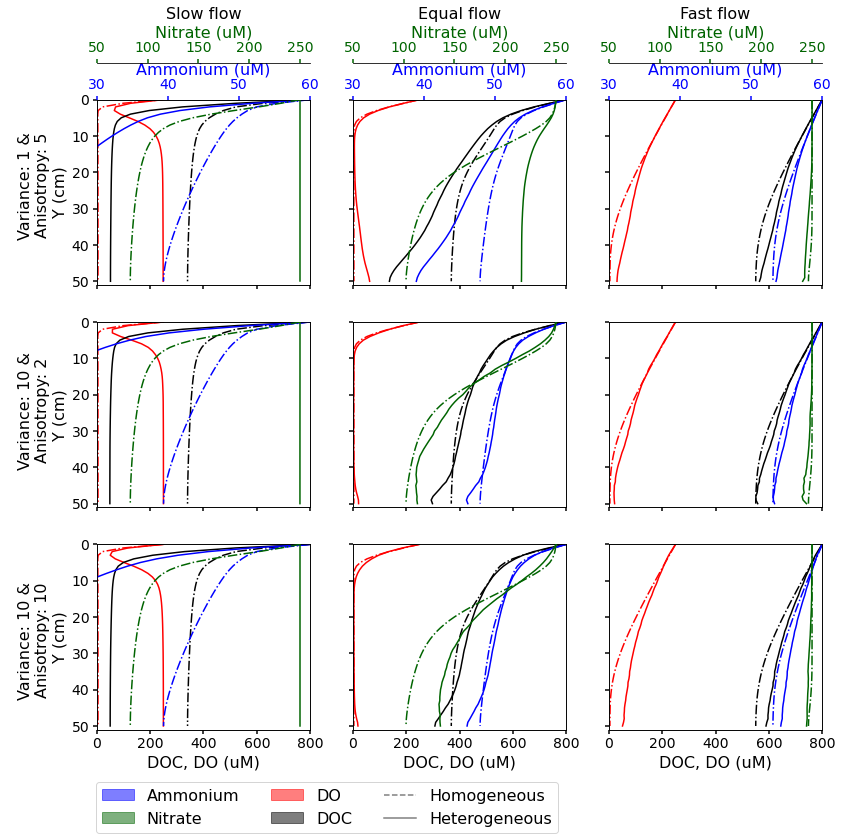

In [4]:
modeltrial = ["50", "73", "63"]
profile1d(modeltrial)
#picname = os.path.join(output_dir, "dissolved_species_1D.png")
#plt.savefig(picname, dpi = 300, bbox_inches = 'tight', pad_inches = 0.1)
#picname = os.path.join(ouput_dir, "dissolved_species_1D.pdf")
#plt.savefig(picname, bbox_inches = 'tight', pad_inches = 0.1)

### Reactive species: 1D profile: Takeaways
- Homogeneous scenarios:
    - similar to saturated scenarios. The saturation is also high in homogeneous scenarios and average velocity differs a lot (see attached excel sheet). So right now, we cannot compare the homogeneous and heterogeneous scenarios.
- Heterogeneous scenarios:
    - Slow flow - DO reduces steeply in the beginning (but still high concentrations ~50 uM) and recovers to near saturation further downgradient. This results in higher consumption of ammonia as well (compared to saturated regimes).
    - Medium flow - DO dies to <10uM but recovers much further downgradient in the domain. Nitrate reduction kicks in when DO is low and then we see nitrate concentration stabilising or slightly rising when DO begins to recover downgradient. Ammonia oxidation and DOC consumption gets activated again when DO concentration rises downgradient.
    - Fast flow - First look: DO doesn't die at any point in the domain and therefore hard for nitrate reduction to get activated. This is similar to saturated regimes, but that is because in both cases we have predominantly aerobic conditions more or less.

## Reactice species: 2D profile/heatmaps

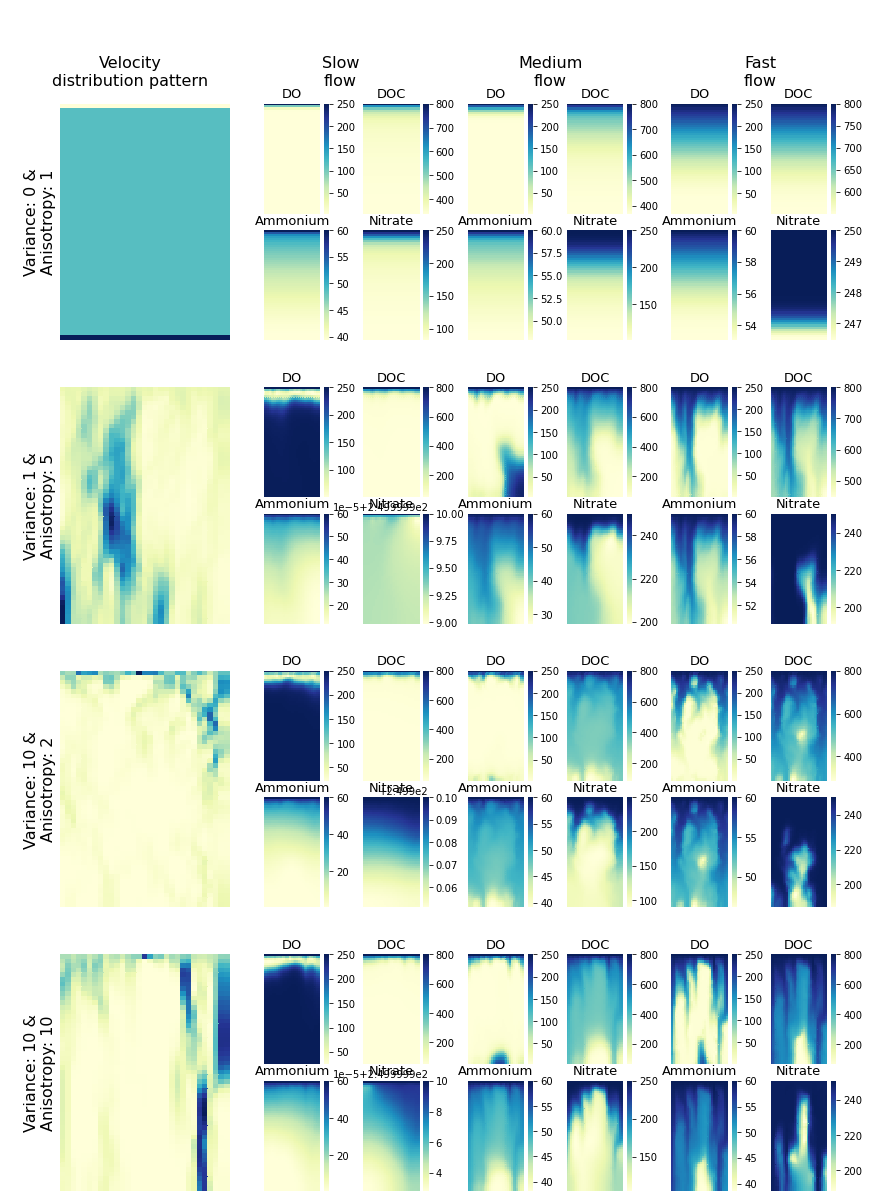

In [5]:
profile2d(["H","50", "73", "63"], ["DO", "DOC", "Ammonium", "Nitrate"])

### Reactive species: 2D profile: Takeaways

- DO is pretty much persistent across all domains - the most in the slow flow regime, but also in the medium and fast flow regimes. DO recovers quickly in the slow flow regime, near the outlet in the meduim flow regime, and is persistent in the fast flow regime while also recovering towards the outlet.
- Nitrate is not consumed at all in the slow flow regime. Nitrate reduces  in concentration in the low permeable zones of the domain as well downgradient sections as DO reduces in concentration. But if DO recovers, then nitrate concentration is higher.
- Ammonia is consumed much more in the unsaturated regimes as persistence of DO is higher. It is consumed the most in the slow flow regime (might also be at the rate limiting threshold). The reduced concentration is comparable to that in the saturated regimes for medium and fast flow.

# Visualize velocities and saturation for context

- Units of velocity are m/d
- P is Pressure (kPa)
- Sat is saturation (m3/m3) varying betwen 0.2 and 0.8. So sat = 0.8 means effective saturation = 1, and sat = 0.2 means effective saturation = 0

<ipython-input-6-0db7579ed04b>:46: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


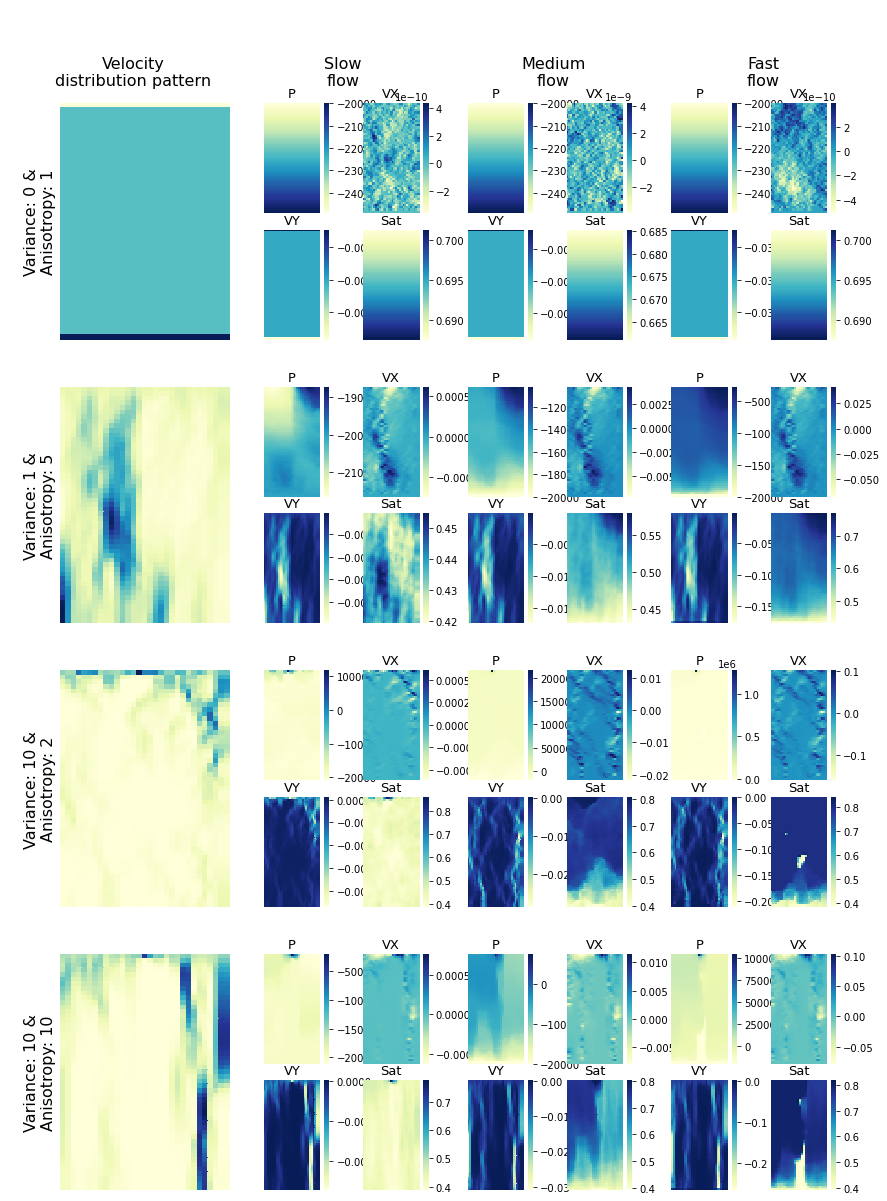

In [6]:
import matplotlib.gridspec as gridspec
Regimes = ["Slow", "Equal", "Fast"]
trialist = proc.masterscenarios()
Trial = ["H","50", "73", "63"]
species = proc.speciesdict("Unsaturated")
gvarnames = ["P","VX", "VY", "Sat"]
gindx = [0,1,2,4]
velindex = 2
colorscheme = 'YlGnBu'
columntitles = ["Velocity\ndistribution pattern", "Slow\nflow", "Medium\nflow", "Fast\nflow"]
fig = plt.figure(figsize=(14, 20))
outer = gridspec.GridSpec(4, 4, wspace=0.2, hspace=0.2)
pad = 210
for t in Trial:
    file = os.path.join(raw_dir, "SlowAR_0/SlowAR_0_RF-A"+str(t)+"_df.npy")
    data = np.load(file)
    left = gridspec.GridSpecFromSubplotSpec(1, 1,
                subplot_spec=outer[4*Trial.index(t)], wspace=0.3, hspace=0.1)
    axe = plt.Subplot(fig, left[0])
    velocity = abs(data[velindex, -1, :, :])
    sns.heatmap(velocity, cmap = colorscheme, ax = axe, cbar = False)
    axe.set_ylabel ("Variance: " + str(trialist[t]["Het"])+ " &\nAnisotropy: " + str(trialist[t]["Anis"]),
                       rotation = "vertical", fontsize = 16, ha = "center")
    axe.set_xticks([])
    axe.set_yticks([])
    fig.add_subplot(axe)    
    for r in Regimes:
        i = Trial.index(t)*len(Regimes) + Regimes.index(r) + Trial.index(t) + 1
        if i%4 != 0:
            inner = gridspec.GridSpecFromSubplotSpec(2, 2,
                                                        subplot_spec=outer[i], wspace=0.4, hspace=0.15)
            file = os.path.join(raw_dir, r + "AR_0/", r+"AR_0_RF-A"+str(t)+"_df.npy")
            data = np.load(file)
            for g in gvarnames:
                axe = plt.Subplot(fig, inner[gvarnames.index(g)])
                sns.heatmap (data[gindx[gvarnames.index(g)], -1, :, :], cmap = colorscheme, ax= axe)
                axe.set_title(g, fontsize = 13, ha = "center")
                axe.set_xticks([])
                axe.set_yticks([])
                fig.add_subplot(axe)
for a in range(4):
    plt.annotate(columntitles[a], xy=(0.15, 0.92), xytext=(0.0 + pad*a, 10),
                xycoords='figure fraction', textcoords='offset points',
                size='large', ha='center', va='baseline',
                fontsize = 16)
fig.show()

## Saturation and velocity: Takeaways
- The range of saturation is similar between scenarios (except homogeneous case) but the average saturation varies a lot (see attached excel sheet).
- The same is the case with the average velocity in the y direction. (relevant notes in the e-mail).

## Biomass: Concentration profiles-1D and 2D
* Defining the function for flux averaged concentrations of reactive species in 1D domain
* Defining the function for heatmaps of reactive species concentrations in 2D

In [18]:
def biomass2d(Trial):
    import matplotlib.gridspec as gridspec
    
    Regimes = ["Slow", "Equal", "Fast"]
    trialist = proc.masterscenarios()
    species = proc.speciesdict("Unsaturated")
    iaspecies = list(g for g in species if ((species[g]["State"]=="Active") and (species[g]["Location"] == "Immobile")))
    gvarnames = list(g for g in iaspecies if (g != "Immobile active sulphate reducers"))
    sptitles = ["Aerobic\ndegraders", "Nitrate\nreducers", "Ammonia\noxidizers"]
    velindex = 2
    colorscheme = 'YlGnBu'
    columntitles = ["Velocity\ndistribution pattern", "Slow flow", "Medium flow", "Fast flow"]
    fig = plt.figure(figsize=(24, 12))
    outer = gridspec.GridSpec(4, 4, width_ratios = [0.2,1, 1, 1],wspace=0.15, hspace=0.3)
    pad = 0.28
    for t in Trial:
        file = os.path.join(raw_dir, "EqualAR_0","EqualAR_0_RF-A"+str(t)+"_df.npy")
        data = np.load(file)
        left = gridspec.GridSpecFromSubplotSpec(1, 1,subplot_spec=outer[4*Trial.index(t)],wspace=0.3,hspace=0.1)
        axe=plt.Subplot(fig, left[0])
        velocity=abs(data[velindex,-1,:,:])
        sns.heatmap(velocity,cmap=colorscheme,ax=axe,cbar=False)
        axe.set_ylabel ("Variance: "+str(trialist[t]["Het"])+" &\nAnisotropy: "+str(trialist[t]["Anis"]),
                       rotation="vertical",fontsize=18,ha="center")
        axe.set_xticks([])
        axe.set_yticks([])
        fig.add_subplot(axe)
        for r in Regimes:
            i=Trial.index(t)*len(Regimes)+Regimes.index(r)+Trial.index(t)+1
            if i%4!=0:
                inner = gridspec.GridSpecFromSubplotSpec(1,3,subplot_spec=outer[i],wspace=0.3,hspace=0.1)
                file = os.path.join(raw_dir, r+"AR_0",r+"AR_0_RF-A"+str(t)+"_df.npy")
                data = np.load(file)
                for g in gvarnames:
                    axe=plt.Subplot(fig,inner[gvarnames.index(g)])
                    sns.heatmap (data[species[g]["TecIndex"],-1,:,:],cmap=colorscheme,ax= axe)
                    axe.set_title(sptitles[gvarnames.index(g)],fontsize=13,ha="center")
                    axe.set_xticks([])
                    axe.set_yticks([])
                    fig.add_subplot(axe)
    for a in range(1,4,1):
        plt.annotate(columntitles[a],xy=(0.05, 0.05),xytext=(0.28 + (a-1)*pad, 0.95),
                    xycoords='figure fraction',textcoords='figure fraction',
                    size='large',ha='center',va='baseline',fontsize = 18)
    plt.annotate(columntitles[0],xy=(0.1, 0.92),xytext=(0.1, 0.913),xycoords='figure fraction',textcoords='figure fraction',size='large',ha='center',va='baseline',fontsize=18)
#    fig.show()
#picname = "Y:/Home/khurana/4. Publications/Restructuring/Paper1/Figurecodes/FigureB4_immobile_biomass_heatmaps.png"
#plt.savefig(picname, dpi = 300, bbox_inches = 'tight', pad_inches = 0.1)
#picname = "Y:/Home/khurana/4. Publications/Restructuring/Paper1/Figurecodes/FigureB4_immobile_biomass_heatmaps.pdf"
#plt.savefig(picname, dpi = 300, bbox_inches = 'tight', pad_inches = 0.1)

    return None


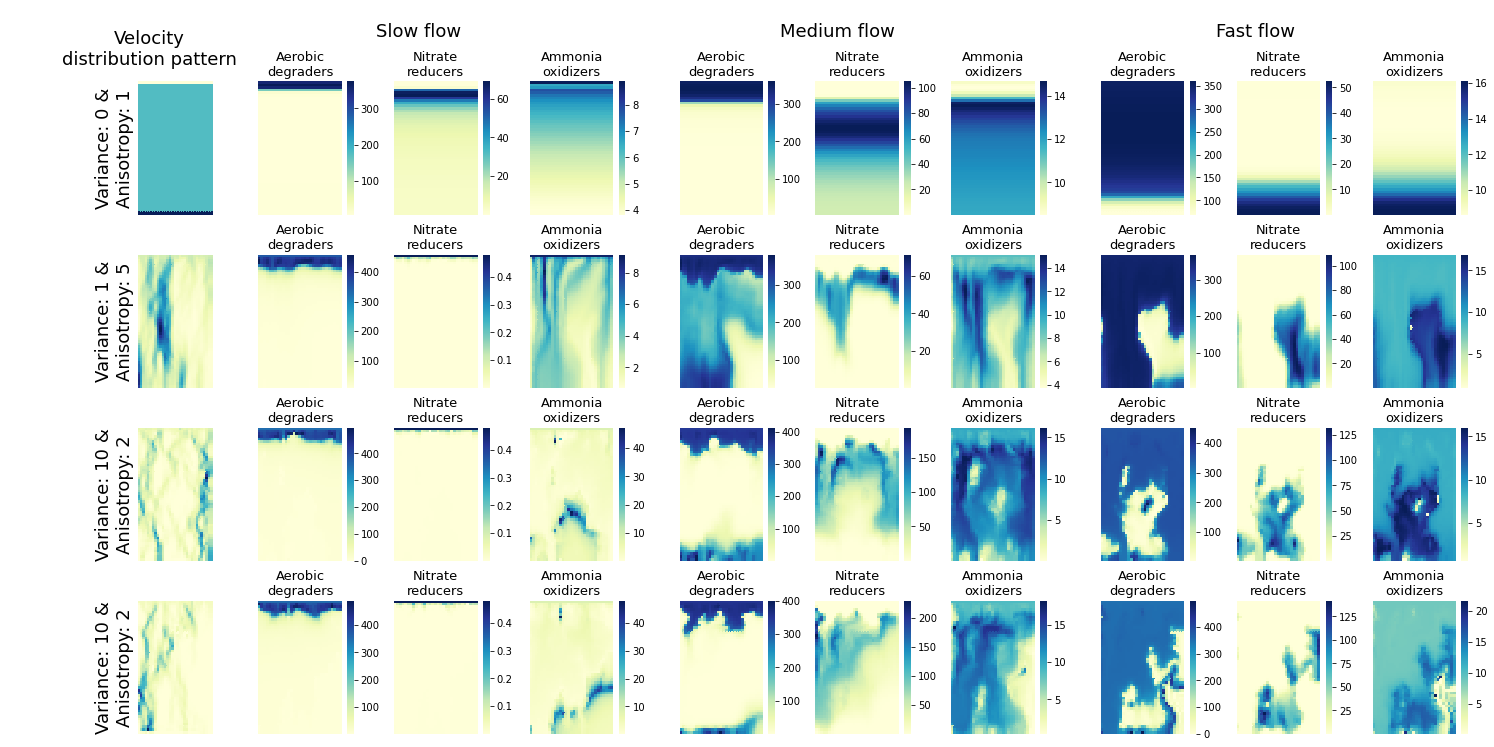

In [19]:
biomass2d(["H","50","73","61"])

### Biomass: 2D profile: Takeaways
*not considering homogeneous scenarios*
- Slow flow
    - Aerobic degraders are persistent everywhere, but highest concentration is at the inlet
    - Ammonia oxidizers are persistent everywhere, but the concentration of ammonia oxidizers in higher heterogeneity scenarios is remarkably higher than that in less heterogeneous scenarios.
    - Nitrate reducers don't kick in much.
- Medium flow
    - Aerobic degraders are persistent throughout but highest concentration is close to the inlet and same order is close to the outlet (because of the rise of DO towarsd outlet, see above).
    - Ammonia oxidizers are persistent thoughtout the domain, co-existing with both nitrate reducers and ammonia oxidizers. Higher concentration is close to the preferential flowpaths, due to access to DO.
    - More nitrate reducers are seen to be active in the meduim zone of the domain after aerobic degraders decrease due to decreasing DO concentrations, and before aerobic degraders start increasing in concentration again towards the outlet.
- Fast flow
    - Aerobic degraders are persistent rhoughout - governed by access to DO along preferential flowpaths.
    - Ammonia oxidizers are now higher in concentration close to but not in the preferential flow paths, in fact coexisting with nitrate reducers.
    - Nitrat reducers are higher in concentration in the low permeable zones in the domain, or close to outlet where DO is lower in concentration, or not competing with aerobic degraders for access to DOC.    